## Importing the relevant packages

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.graphics.tsaplots as sgt
import statsmodels.tsa.stattools as sts
from statsmodels.tsa.arima.model import ARIMA
from scipy.stats.distributions import chi2 
from math import sqrt
import seaborn as sns
sns.set()

## Importing the Data and Pre-processing 

In [2]:
raw_csv_data = pd.read_csv("Index2023.csv") 
df_comp=raw_csv_data.copy()
df_comp.date = pd.to_datetime(df_comp.date, dayfirst = False)
df_comp.set_index("date", inplace=True)
df_comp=df_comp.asfreq('b')
df_comp=df_comp.fillna(method='ffill')

C:\Users\heber\AppData\Local\Temp\ipykernel_8460\1907149261.py:6: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_comp=df_comp.fillna(method='ffill')


In [ ]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
df_comp['market_value']=df_comp.ftse

In [5]:
#del df_comp['spx']
#del df_comp['dax']
#del df_comp['ftse']
#del df_comp['nikkei']
size = int(len(df_comp)*0.8)
df, df_test = df_comp.iloc[:size], df_comp.iloc[size:]

## The LLR Test

In [6]:
def LLR_test(mod_1, mod_2, DF = 1):
    L1 = mod_1.llf
    L2 = mod_2.llf
    LR = (2*(L2-L1))    
    p = chi2.sf(LR, DF).round(4)
    return p

## Creating Returns

In [7]:
#Calcula el cambio porcentual entre los valores sucesivos en la columna "market_value"
#mul(100): Multiplica el resultado por 100 para expresar la tasa de rendimiento en términos porcentuales.
df['returns'] = df.market_value.pct_change(1)*100

## ARIMA(1,1,1)

In [10]:
model_ar_1_i_1_ma_1 = ARIMA(df.market_value, order=(1,1,1))
results_ar_1_i_1_ma_1 = model_ar_1_i_1_ma_1.fit()
results_ar_1_i_1_ma_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:           market_value   No. Observations:                 6200
Model:                 ARIMA(1, 1, 1)   Log Likelihood              -34020.746
Date:                Mon, 09 Oct 2023   AIC                          68047.491
Time:                        23:04:19   BIC                          68067.688
Sample:                    01-07-1994   HQIC                         68054.493
                         - 10-12-2017                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.8293      0.042     19.867      0.000       0.748       0.911
ma.L1         -0.8644      0.037    -23.226      0.000      -0.937      -0.791
sigma2      3423.1178     36.794     93.035      0.000    3351.003    3495.233
===================================================================================
Ljung-Box (L1) (Q):                   2.89   Jarque-Bera (JB):              3628.96
Prob(Q):                              0.09   Prob(JB):                         0.00
Heteroskedasticity (H):               1.07   Skew:                            -0.32
Prob(H) (two-sided):                  0.12   Kurtosis:                         6.69
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

## Residuals of the ARIMA(1,1,1)

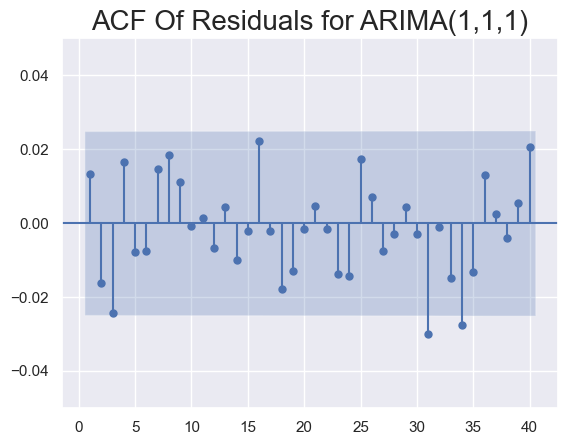

In [15]:
df['res_ar_1_i_1_ma_1'] = results_ar_1_i_1_ma_1.resid
sgt.plot_acf(df.res_ar_1_i_1_ma_1, zero = False, lags = 40)
plt.title("ACF Of Residuals for ARIMA(1,1,1)",size=20)
plt.ylim(-0.05,0.05)
plt.show()

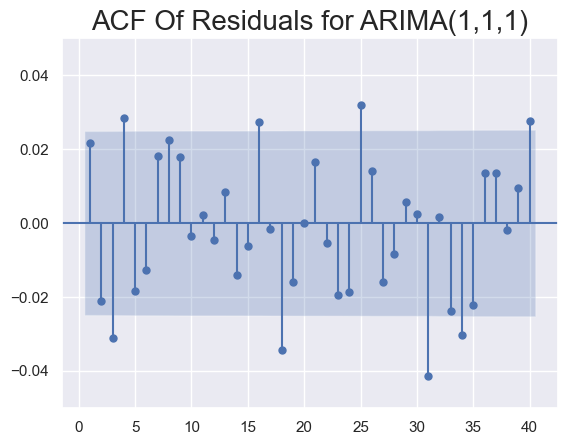

In [18]:
df['res_ar_1_i_1_ma_1'] = results_ar_1_i_1_ma_1.resid.iloc[:]
sgt.plot_acf(df.res_ar_1_i_1_ma_1[1:], zero = False, lags = 40)
plt.title("ACF Of Residuals for ARIMA(1,1,1)",size=20)
plt.ylim(-0.05,0.05)
plt.show()

## Higher-Lag ARIMA Models

In [48]:
model_ar_1_i_1_ma_2 = ARIMA(df.market_value, order=(1,1,2))
results_ar_1_i_1_ma_2 = model_ar_1_i_1_ma_2.fit()
model_ar_1_i_1_ma_3 = ARIMA(df.market_value, order=(1,1,3))
results_ar_1_i_1_ma_3 = model_ar_1_i_1_ma_3.fit()
model_ar_2_i_1_ma_1 = ARIMA(df.market_value, order=(2,1,1))
results_ar_2_i_1_ma_1 = model_ar_2_i_1_ma_1.fit()
model_ar_3_i_1_ma_1 = ARIMA(df.market_value, order=(3,1,1))
results_ar_3_i_1_ma_1 = model_ar_3_i_1_ma_1.fit()

#No tengo idea :C
#model_ar_3_i_1_ma_2 = ARIMA(df.market_value, order=(3,1,2))
#results_ar_3_i_1_ma_2 = model_ar_3_i_1_ma_2.fit(start_ar_lags=5)

In [49]:
print("ARIMA(1,1,1):  \t LL = ", results_ar_1_i_1_ma_1.llf, "\t AIC = ", results_ar_1_i_1_ma_1.aic)
print("ARIMA(1,1,2):  \t LL = ", results_ar_1_i_1_ma_2.llf, "\t AIC = ", results_ar_1_i_1_ma_2.aic)
print("ARIMA(1,1,3):  \t LL = ", results_ar_1_i_1_ma_3.llf, "\t AIC = ", results_ar_1_i_1_ma_3.aic)
print("ARIMA(2,1,1):  \t LL = ", results_ar_2_i_1_ma_1.llf, "\t AIC = ", results_ar_2_i_1_ma_1.aic)
print("ARIMA(3,1,1):  \t LL = ", results_ar_3_i_1_ma_1.llf, "\t AIC = ", results_ar_3_i_1_ma_1.aic)
#print("ARIMA(3,1,2):  \t LL = ", results_ar_3_i_1_ma_2.llf, "\t AIC = ", results_ar_3_i_1_ma_2.aic)

ARIMA(1,1,1):  	 LL =  -34020.74567146156 	 AIC =  68047.49134292312
ARIMA(1,1,2):  	 LL =  -34016.70558081102 	 AIC =  68041.41116162205
ARIMA(1,1,3):  	 LL =  -34014.003521878345 	 AIC =  68038.00704375669
ARIMA(2,1,1):  	 LL =  -34016.54749137798 	 AIC =  68041.09498275597
ARIMA(3,1,1):  	 LL =  -34015.49665807852 	 AIC =  68040.99331615704


In [39]:
print("\nLLR test p-value = " + str(LLR_test(results_ar_1_i_1_ma_2, results_ar_1_i_1_ma_3)))
#Rechazar la hipótesis nula
#El modelo alternativo (results_ar_1_i_1_ma_3) es preferible al modelo nulo (results_ar_1_i_1_ma_2) en función de la verosimilitud de los datos observados.


LLR test p-value = 0.0201


In [40]:
print("\nLLR test p-value = " + str(LLR_test(results_ar_1_i_1_ma_1, results_ar_1_i_1_ma_3, DF = 2)))
#Rechazar la hipótesis nula
#El modelo alternativo (results_ar_1_i_1_ma_3) es preferible al modelo nulo (results_ar_1_i_1_ma_1) en función de la verosimilitud de los datos observados.


LLR test p-value = 0.0012


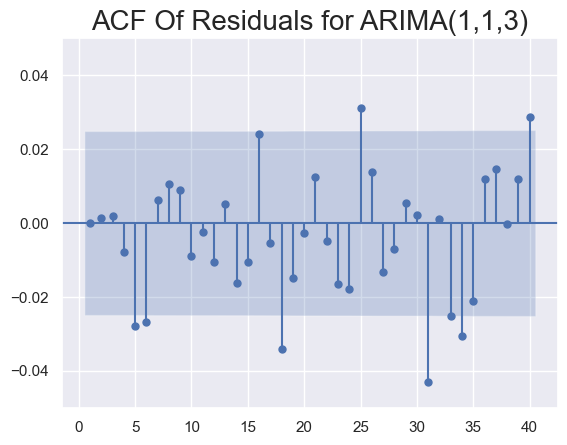

In [50]:
df['res_ar_1_i_1_ma_3'] = results_ar_1_i_1_ma_3.resid
sgt.plot_acf(df.res_ar_1_i_1_ma_3[1:], zero = False, lags = 40)
plt.title("ACF Of Residuals for ARIMA(1,1,3)", size=20)
plt.ylim(-0.05,0.05)
plt.show()

In [ ]:
model_ar_5_i_1_ma_1 = ARIMA(df.market_value, order=(5,1,1))
results_ar_5_i_1_ma_1 = model_ar_5_i_1_ma_1.fit(start_ar_lags=11)
model_ar_6_i_1_ma_3 = ARIMA(df.market_value, order=(6,1,3))
results_ar_6_i_1_ma_3 = model_ar_6_i_1_ma_3.fit(start_ar_lags=11)

In [ ]:
results_ar_5_i_1_ma_1.summary()

In [ ]:
print("ARIMA(1,1,3):  \t LL = ", results_ar_1_i_1_ma_3.llf, "\t AIC = ", results_ar_1_i_1_ma_3.aic)
print("ARIMA(5,1,1):  \t LL = ", results_ar_5_i_1_ma_1.llf, "\t AIC = ", results_ar_5_i_1_ma_1.aic)
print("ARIMA(6,1,3):  \t LL = ", results_ar_6_i_1_ma_3.llf, "\t AIC = ", results_ar_6_i_1_ma_3.aic)

In [ ]:
print("\nLLR test p-value = " + str(LLR_test(results_ar_1_i_1_ma_3, results_ar_6_i_1_ma_3, DF = 5)))

In [ ]:
print("\nLLR test p-value = " + str(LLR_test(results_ar_5_i_1_ma_1, results_ar_6_i_1_ma_3, DF = 3)))

In [ ]:
df['res_ar_5_i_1_ma_1'] = results_ar_5_i_1_ma_1.resid
sgt.plot_acf(df.res_ar_5_i_1_ma_1[1:], zero = False, lags = 40)
plt.title("ACF Of Residuals for ARIMA(5,1,1)", size=20)
plt.show()

## Models with Higher Levels of Integration

In [57]:
#calcula la diferencia entre cada elemento de la serie market_value y su elemento anterior.
df['delta_prices']=df.market_value.diff(1)

In [58]:
model_delta_ar_1_i_1_ma_1 = ARIMA(df.delta_prices[1:], order=(1,0,1))
results_delta_ar_1_i_1_ma_1 = model_delta_ar_1_i_1_ma_1.fit()
results_delta_ar_1_i_1_ma_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:           delta_prices   No. Observations:                 6199
Model:                 ARIMA(1, 0, 1)   Log Likelihood              -34020.119
Date:                Tue, 10 Oct 2023   AIC                          68048.239
Time:                        00:13:26   BIC                          68075.167
Sample:                    01-10-1994   HQIC                         68057.575
                         - 10-12-2017                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.6607      0.657      1.006      0.315      -0.627       1.948
ar.L1          0.8347      0.040     20.692      0.000       0.756       0.914
ma.L1         -0.8695      0.036    -24.113      0.000      -0.940      -0.799
sigma2      3422.8247     37.021     92.456      0.000    3350.265    3495.384
===================================================================================
Ljung-Box (L1) (Q):                   2.85   Jarque-Bera (JB):              3635.36
Prob(Q):                              0.09   Prob(JB):                         0.00
Heteroskedasticity (H):               1.07   Skew:                            -0.32
Prob(H) (two-sided):                  0.12   Kurtosis:                         6.70
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [59]:
sts.adfuller(df.delta_prices[1:])
#Ho = Hay raiz unitaria (No estacionariedad)
#Ha = No hay raiz unitaria (Estacionariedad)

(-35.42231481451861,
 0.0,
 5,
 6193,
 {'1%': -3.431406355974594,
  '5%': -2.8620068149070077,
  '10%': -2.5670184827348006},
 67673.02278668244)

In [ ]:
model_ar_1_i_2_ma_1 = ARIMA(df.market_value, order=(1,2,1))
results_ar_1_i_2_ma_1 = model_ar_1_i_2_ma_1.fit(start_ar_lags=10)
results_ar_1_i_2_ma_1.summary()

In [ ]:
df['res_ar_1_i_2_ma_1'] = results_ar_1_i_2_ma_1.resid.iloc[:]
sgt.plot_acf(df.res_ar_1_i_2_ma_1[2:], zero = False, lags = 40)
plt.title("ACF Of Residuals for ARIMA(1,2,1)",size=20)
plt.show()

## ARIMAX 

In [64]:
#Modelo ARIMA con un componente exógeno
model_ar_1_i_1_ma_1_Xspx = ARIMA(df.market_value, exog = df.spx, order=(1,1,1))
results_ar_1_i_1_ma_1_Xspx = model_ar_1_i_1_ma_1_Xspx.fit()
results_ar_1_i_1_ma_1_Xspx.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:           market_value   No. Observations:                 6200
Model:                 ARIMA(1, 1, 1)   Log Likelihood              -32877.656
Date:                Tue, 10 Oct 2023   AIC                          65763.312
Time:                        00:16:27   BIC                          65790.241
Sample:                    01-07-1994   HQIC                         65772.648
                         - 10-12-2017                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
spx            2.5920      0.031     83.385      0.000       2.531       2.653
ar.L1          0.2135      0.030      7.203      0.000       0.155       0.272
ma.L1         -0.4828      0.027    -18.130      0.000      -0.535      -0.431
sigma2      2367.1095     24.581     96.300      0.000    2318.932    2415.287
===================================================================================
Ljung-Box (L1) (Q):                   0.12   Jarque-Bera (JB):              4641.74
Prob(Q):                              0.73   Prob(JB):                         0.00
Heteroskedasticity (H):               0.77   Skew:                            -0.45
Prob(H) (two-sided):                  0.00   Kurtosis:                         7.14
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

## SARIMAX

In [65]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [66]:
#Modelo SARIMAX con una componente estacional (seasonal_order) y una variable exógena (exog) 
#hay factores externos o patrones estacionales que pueden influir en la serie temporal.
model_sarimax = SARIMAX(df.market_value, exog = df.spx, order=(1,0,1), seasonal_order = (2,0,1,5))
results_sarimax = model_sarimax.fit()
results_sarimax.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                     
=========================================================================================
Dep. Variable:                      market_value   No. Observations:                 6200
Model:             SARIMAX(1, 0, 1)x(2, 0, 1, 5)   Log Likelihood              -32892.535
Date:                           Tue, 10 Oct 2023   AIC                          65799.069
Time:                                   00:17:53   BIC                          65846.195
Sample:                               01-07-1994   HQIC                         65815.408
                                    - 10-12-2017                                         
Covariance Type:                             opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
spx            2.6015      0.031     83.700      0.000       2.541       2.662
ar.L1          0.9998      0.000   2540.568      0.000       0.999       1.001
ma.L1         -0.2846      0.009    -32.436      0.000      -0.302      -0.267
ar.S.L5        0.9700      0.011     85.513      0.000       0.948       0.992
ar.S.L10       0.0297      0.008      3.790      0.000       0.014       0.045
ma.S.L5       -0.9996      0.009   -113.002      0.000      -1.017      -0.982
sigma2      2371.6006     25.998     91.224      0.000    2320.646    2422.555
===================================================================================
Ljung-Box (L1) (Q):                   1.04   Jarque-Bera (JB):              4475.14
Prob(Q):                              0.31   Prob(JB):                         0.00
Heteroskedasticity (H):               0.76   Skew:                            -0.42
Prob(H) (two-sided):                  0.00   Kurtosis:                         7.08
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""